## Step 1: Import Machine Learning Libraries for this task

Check all the

`import [library full name] as [short name]` 

in the skeleton code. If you use any off-line IDE, such as
PyCharm, make sure you pre-installed all the required Python libraries for the machine learning task. Please
contact the tutor if you need any technical support to set up your coding environment. 

If you need any extra tools/libraries, please also add them here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data,color,feature
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from skimage import feature
from keras.layers import Dropout
from itertools import chain
from PIL import Image
from skimage import color, io
from sklearn.svm import SVC
import cv2
import os
from skimage.feature import hog
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers, models, optimizers, regularizers


## Step 2: Data Preparation
* Mount your google drive to this project
* Load files: `positive_patches.npy` and `negative_patches.npy`
* The dataset has __13233__ positive data and __30000__ negative data
* Reshape the raw patches (1-D 2914 pixels per picture) as 2-D __62*47__ image patches
* Display some positive samples and negative samples 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
positive_patches = np.load("/content/drive/MyDrive/AI-Assignment/Datasets/positive_patches.npy").reshape((-1, 62, 47))
negative_patches = np.load("/content/drive/MyDrive/AI-Assignment/Datasets/negative_patches.npy").reshape((-1, 62, 47))

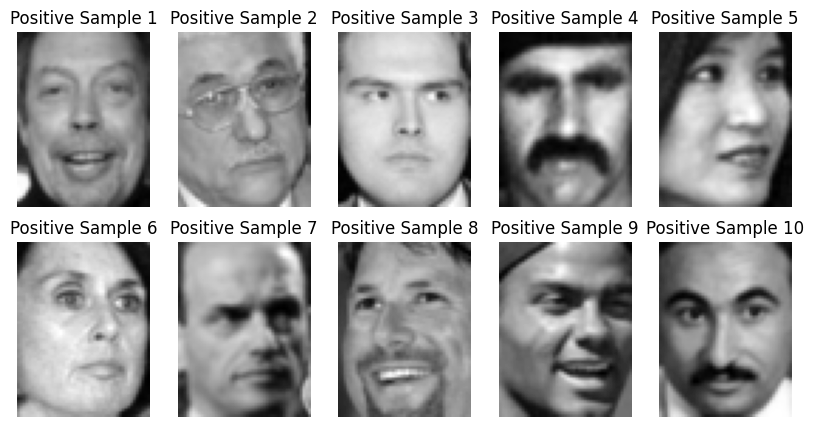

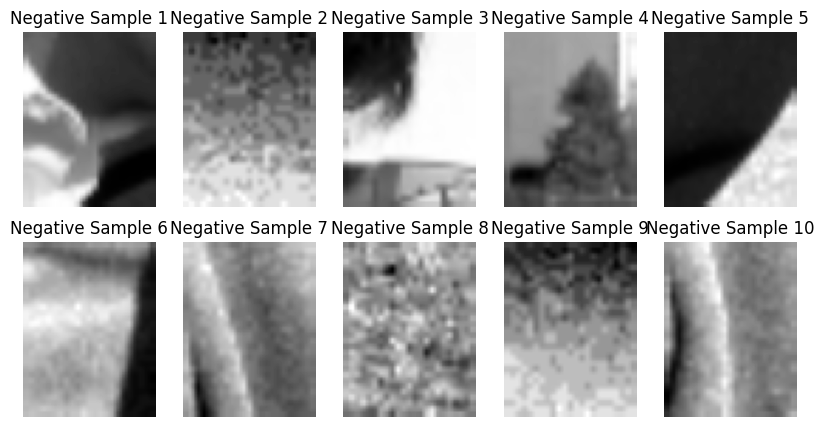

In [9]:
# Display some positive samples
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(positive_patches[i], cmap='gray')
    ax.axis('off')
    ax.set_title('Positive Sample {}'.format(i+1))
plt.show()

# Display some negative samples
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(negative_patches[i], cmap='gray')
    ax.axis('off')
    ax.set_title('Negative Sample {}'.format(i+1))
plt.show()

## Step 3: Feature Extraction and Binary Labels
We will use a Sci-kit Learn Image Processing (A Wrap version of the OpenCV) package to extract the 2D HoG features and use them as the feature space for the machine learning algorithms.

Also, face detection uses binary classification algorithms, which requires feature space `X` and labels `y`



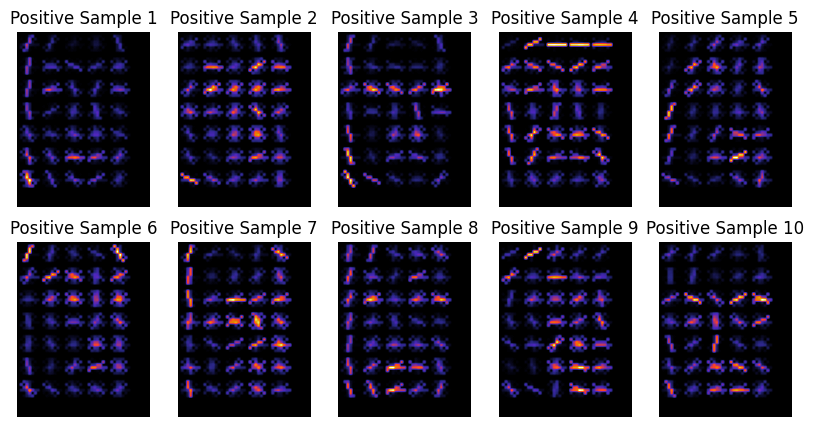

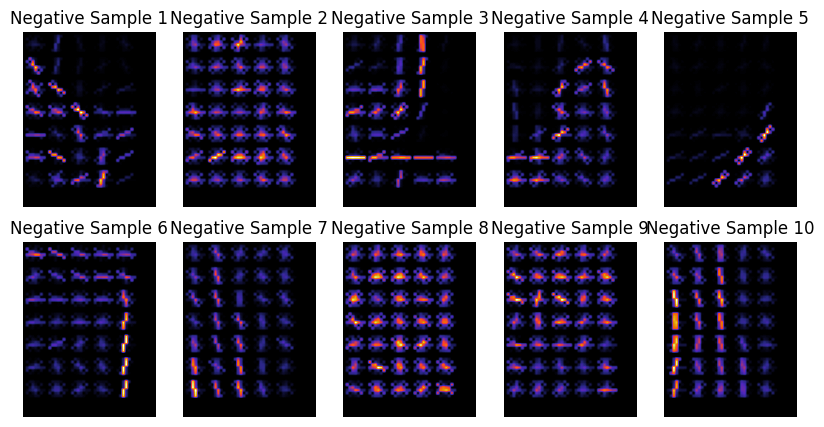

In [11]:
#Display some positive features
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(positive_patches[i], cmap='gray')
    ax.set_title('Positive Sample {}'.format(i+1))
    img = positive_patches[i]
    hog_vec, hog_vis = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(1,1),visualize=True)
    ax.imshow(hog_vis,cmap='CMRmap')
    ax.axis('off')  
plt.show()

#Display some negative features
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(negative_patches[i], cmap='gray')
    ax.set_title('Negative Sample {}'.format(i+1))
    img = negative_patches[i]
    hog_vec, hog_vis = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(1,1),visualize=True)
    ax.imshow(hog_vis,cmap='CMRmap')
    ax.axis('off')  
plt.show()

In [12]:
# Extract HOG features for positive and negative patches
X_pos = np.array([feature.hog(patch) for patch in positive_patches])
X_neg = np.array([feature.hog(patch) for patch in negative_patches])
X = np.vstack((X_pos, X_neg))

# Create target labels for the positive and negative patches
y = np.zeros(len(X))
y[:len(X_pos)] = 1

## Step 4: Train Your Binary Classification ML Algorithm(s)
* Split the training and test set. Remember to shuffle them 
* Use some suitable machine learning algorithms (which one?) to create a classifier.
* If the training takes too long, you may consider saving your trained model 

In [16]:
#Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=24, shuffle = True)

In [17]:
#Scale training and test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_test = scaler.transform(X_test)

In [18]:
#Create and fit the SVC model
from sklearn.svm import SVC
human_detector = SVC()
human_detector.fit(X_train, y_train)

SVC()

## Step 5: Performance Validation

* Use test dataset to calculate the confusion matrix
* If you use more than one algorithm or carried out some comparison tests, generate multiple confusion matrices for each case

In [21]:
#Use examples from the database for testing
image = np.array([feature.hog(negative_patches[11])])
image2 = np.array([feature.hog(positive_patches[3])])
prediction1 = human_detector.predict(image)
prediction2 = human_detector.predict(image2)
print(prediction1,prediction2)

[0.] [1.]


In [22]:
# Use the trained model to predict the classes of the test data
y_pred = human_detector.predict(X_test)
# Calculate the confusion matrix
confusion_matrix(y_test, y_pred)

array([[6022,    1],
       [  56, 2568]])

In [23]:
def Check_Human(prediction):
  if(prediction == 1):
    return "FACE DETECTED"
  else:
    return "NO FACE DETECTED"


In [24]:
print(Check_Human(prediction1))
print(Check_Human(prediction2))

NO FACE DETECTED
FACE DETECTED


## Extra Task

Complete the skeleton code gives you a solid foundation to build an effective face detection system. You are
encouraged to carry out more exploration from there and aim at creating a better face detection application. You
can either use taught or untaught techniques for this project. You are welcome to add new functions and improve
the source code. You can discuss the ideas if you have specific additions in mind. 


In [46]:
#Create, Compile, and Fit a CNN Sequential model for more accurate predictions against unsees data
from tensorflow.keras.optimizers import Adam

# Load data
positive_patches = np.load('/content/drive/MyDrive/AI-Assignment/Datasets/positive_patches.npy')
negative_patches = np.load('/content/drive/MyDrive/AI-Assignment/Datasets/negative_patches.npy')

# Reshape data
positive_patches = positive_patches[:10000].reshape((-1, 62, 47, 1)) / 255.0
negative_patches = negative_patches[:10000].reshape((-1, 62, 47, 1)) / 255.0

# Create labels
X = np.concatenate((positive_patches, negative_patches))
y = np.concatenate((np.ones(len(positive_patches)), np.zeros(len(negative_patches))))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=23)

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='sigmoid', input_shape=(62, 47, 1), kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

class_weights = {0: 1, 1: 100.0}  # set the weight for negative class to 1 and positive class to 10
# Fit the model on augmented data
model.fit(X_train,y_train, epochs=20, validation_data=(X_test, y_test), class_weight=class_weights)


# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)



# Evaluate the model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 58, 43, 64)        1664      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 29, 21, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 17, 128)       204928    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 8, 128)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 12288)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [47]:
#Using unseen images to test accuracy
#Image of my face
img_positive = Image.open("/content/myself.jpg").convert('L')
#Image of a tree
img_negative = Image.open("/content/tree.jpg").convert('L')
#Image containing a friend's face
img = Image.open("/content/luke.jpg").convert('L')

#Rezise images for model
img_positive = img_positive.resize((62,47)) 
img_negative = img_negative.resize((62,47))
img = img.resize((62,47))

#Normalise and reshaoe
img_positive = np.array(img_positive).reshape((-1,62,47,1)) /255.0
img_negative = np.array(img_negative).reshape((-1,62,47,1)) /255.0
img = np.array(img).reshape((-1,62,47,1)) /255.0


In [56]:
#Function that determines if a face is present
def Check_Face(prediction):
  #Prediction scores greater than or equal to 50% are classed as containing faces
  if(prediction >= 0.5):
    return "FACE DETECTED"
  else:
    return "NO FACE DETECTED"

In [57]:
myself = model.predict(img_positive)
print(Check_Face(myself) + (" Score: {}".format(myself)))

1/1 [==============================] - 0s 27ms/step
FACE DETECTED Score: [[0.63510764]]


In [58]:
tree = model.predict(img_negative)
print(Check_Face(tree) + (" Score: {}".format(tree)))

1/1 [==============================] - 0s 24ms/step
NO FACE DETECTED Score: [[0.33752778]]


In [59]:
luke = model.predict(img)
print(Check_Face(luke) + (" Score: {}".format(luke)))

1/1 [==============================] - 0s 20ms/step
FACE DETECTED Score: [[0.7108031]]
